<a href="https://colab.research.google.com/github/Keerthibalraj/Image_processing/blob/main/Part_2_Basic_of_image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

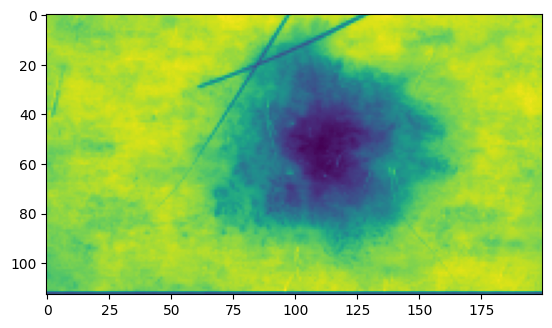

In [4]:
import matplotlib.pyplot as plt

from skimage import io, color
from skimage.transform import rescale, resize, downscale_local_mean

img = io.imread("/content/drive/MyDrive/kaggle/images/ISIC_0024306.jpg", as_gray=True)

img_rescaled = rescale(img, 1.0 / 4.0, anti_aliasing=False)  #Check rescales image size in variable explorer


img_resized = resize(img, (200, 200),               #Check dimensions in variable explorer
                       anti_aliasing=True)


img_downscaled = downscale_local_mean(img, (4, 3))
plt.imshow(img_downscaled)


(450, 600)


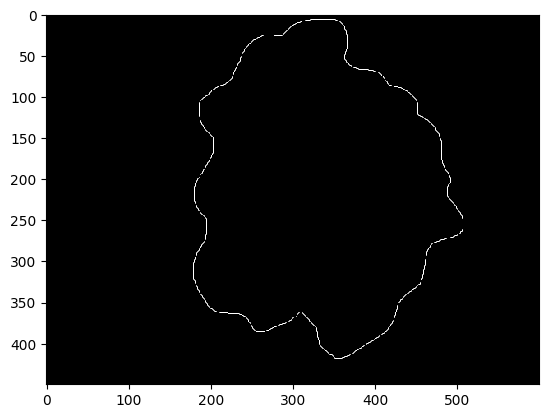

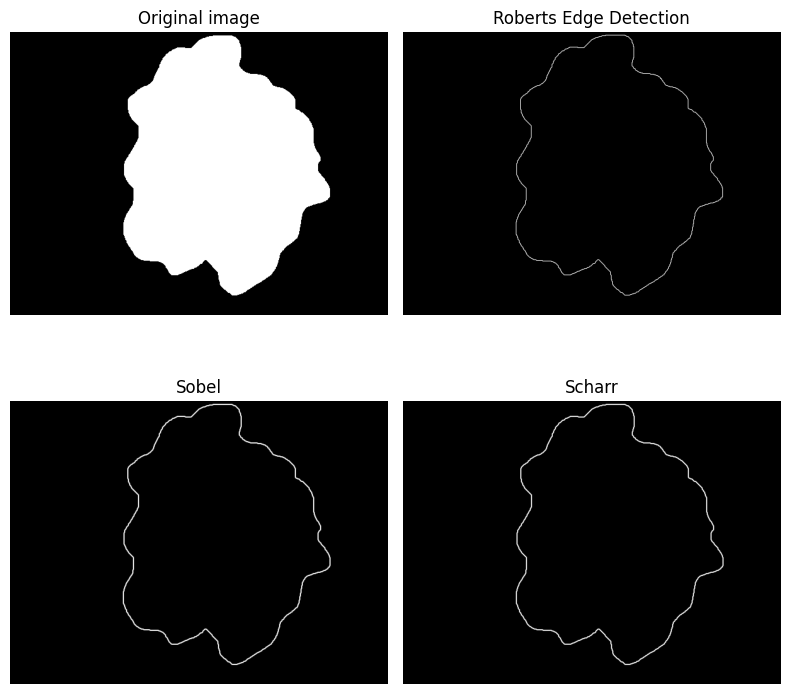

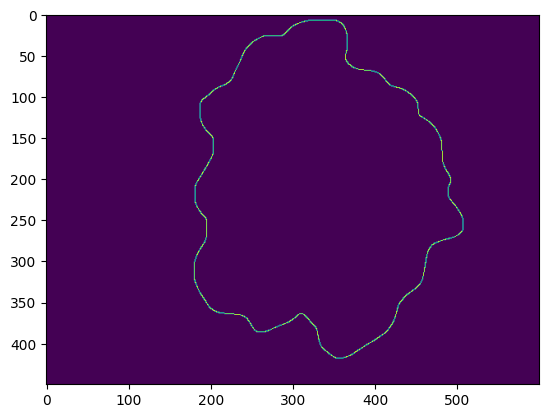

In [7]:

# Edge Detection

import matplotlib.pyplot as plt
from skimage import io
from skimage.filters import roberts, sobel, scharr, prewitt

img = io.imread("/content/drive/MyDrive/kaggle/masks/ISIC_0024306_segmentation.png", as_gray=True)  #Convert to grey scale
print(img.shape)
plt.imshow(img, cmap=plt.cm.gray, interpolation='nearest')

edge_roberts = roberts(img)
plt.imshow(edge_roberts, cmap=plt.cm.gray, interpolation='nearest')
edge_sobel = sobel(img)
edge_scharr = scharr(img)
edge_prewitt = prewitt(img)


fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True,
                         figsize=(8, 8))
ax = axes.ravel()

ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title('Original image')

ax[1].imshow(edge_roberts, cmap=plt.cm.gray)
ax[1].set_title('Roberts Edge Detection')

ax[2].imshow(edge_sobel, cmap=plt.cm.gray)
ax[2].set_title('Sobel')

ax[3].imshow(edge_scharr, cmap=plt.cm.gray)
ax[3].set_title('Scharr')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()


from skimage import feature
edge_canny = feature.canny(img, sigma=3)
plt.imshow(edge_canny)




In [9]:

#Image deconvolution

import matplotlib.pyplot as plt
from skimage import io, color, restoration, img_as_float

img = img_as_float(io.imread("/content/drive/MyDrive/kaggle/masks/ISIC_0024306_segmentation.png"))
print(img.shape)

#PSF
import scipy.stats as st
import numpy as np

#psf = np.ones((3, 3)) / 9  #point spread function to be used for deconvolution.

def gkern(kernlen=21, nsig=2):    #Returns a 2D Gaussian kernel.

    lim = kernlen//2 + (kernlen % 2)/2
    x = np.linspace(-lim, lim, kernlen+1)
    kern1d = np.diff(st.norm.cdf(x))
    kern2d = np.outer(kern1d, kern1d)
    return kern2d/kern2d.sum()

psf = gkern(5,3)   #Kernel length and sigma
print(psf)


deconvolved, _ = restoration.unsupervised_wiener(img, psf)
plt.imsave("/content/drive/MyDrive/kaggle/output/deconvolved.jpg", deconvolved, cmap='gray')



(450, 600)
[[0.003765   0.015019   0.02379159 0.015019   0.003765  ]
 [0.015019   0.05991246 0.0949073  0.05991246 0.015019  ]
 [0.02379159 0.0949073  0.15034262 0.0949073  0.02379159]
 [0.015019   0.05991246 0.0949073  0.05991246 0.015019  ]
 [0.003765   0.015019   0.02379159 0.015019   0.003765  ]]


(450, 600)
The percent white region is:  97.78740740740741


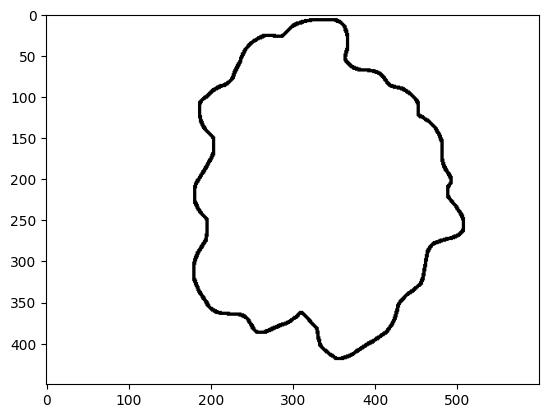

In [10]:
#Entropy filter
import matplotlib.pyplot as plt
from skimage import io, color, restoration, img_as_float

img = io.imread("/content/drive/MyDrive/kaggle/masks/ISIC_0024306_segmentation.png")
print(img.shape)



from skimage.filters.rank import entropy
from skimage.morphology import disk
entropy_img = entropy(img, disk(3))
plt.imshow(entropy_img, cmap=plt.cm.gray)


"""
from skimage.filters import try_all_threshold
fig, ax = try_all_threshold(entropy_img, figsize=(10, 8), verbose=False)
plt.show()
"""

#Now let us test Otsu segmentation.
from skimage.filters import threshold_otsu
thresh = threshold_otsu(entropy_img)   #Just gives us a threshold value. Check in variable explorer.
binary= entropy_img <=thresh  #let us generate a binary image by separating pixels below and above threshold value.
plt.imshow(binary, cmap=plt.cm.gray)
print("The percent white region is: ", (np.sum(binary == 1)*100)/(np.sum(binary == 0) + np.sum(binary == 1)))   #Print toal number of true (white) pixels




(450, 600)


<ipython-input-12-b66db4880a51>:10: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(img, orientations=12, pixels_per_cell=(8, 8), cells_per_block=(2, 2),


82.87097930908203


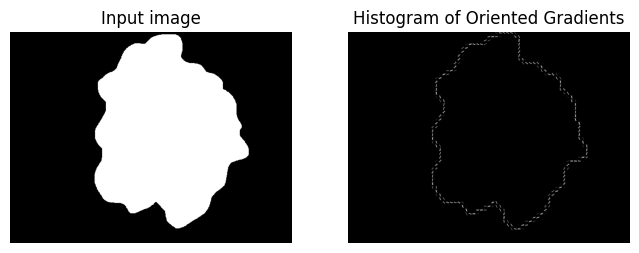

In [12]:
# HOG
import matplotlib.pyplot as plt
from skimage import io, color, restoration, img_as_float
from skimage.feature import hog
from skimage import data, exposure

img = io.imread("/content/drive/MyDrive/kaggle/masks/ISIC_0024306_segmentation.png", as_gray=False)
print(img.shape)

fd, hog_image = hog(img, orientations=12, pixels_per_cell=(8, 8), cells_per_block=(2, 2),
                    visualize=True, multichannel=False)
print(hog_image.max())
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(img, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 50))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()